In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import random
import os
from tensorflow.python.framework import ops


In [2]:

data="/home/jaspreet/Downloads/PetImages"
Categories=["Dog", "Cat"]


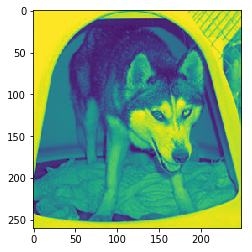

In [3]:

#config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)

for category in Categories:
    
     # here we need to join the path of the directories of dogs and cats together
    path=os.path.join(data, category)
    
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE ) #converting the photo to greyscale
        plt.imshow(img_array)
        plt.show()
        break
    break    

In [4]:
print(img_array)

[[255 255 255 ... 237 249 224]
 [255 255 255 ... 242 225 214]
 [255 255 255 ... 223 219 234]
 ...
 [242 242 241 ... 242 243 242]
 [242 242 241 ... 242 241 241]
 [242 242 241 ... 241 240 241]]


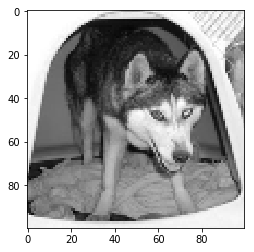

In [ ]:
#The sizes of all the photos are different. 
# changing the size of every photo to a constant size to work for CNN

img_size= 100

new_images=cv2.resize(img_array, (img_size, img_size))  # size of image is 100*100
plt.imshow(new_images, cmap='gray')
plt.show()


In [ ]:
training_data=[]
def create_training_data():
    for category in Categories:
    
        # here we need to join the path of the directories of dogs and cats together
        path=os.path.join(data, category)

        #here we create catogories for the classes for comparison
        class_num=Categories.index(category)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  #converting the photo to grayscale
                new_images=cv2.resize(img_array, (img_size, img_size))  # size of image is 100*100
                training_data.append([new_images, class_num])                
                #print(class_num)
            except Exception as e:
                pass
    plt.imshow(training_data[0], cmap='gray')
    plt.show()

create_training_data()      

In [7]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [8]:
print(len(training_data))

24946


In [9]:
random.shuffle(training_data)

In [90]:
xx=[]
yy=[]

for features, label in training_data:
    xx.append(features)
    yy.append(label)
#print(X)

#converting the pixels into a numpy array
#-1 for including all the images
# img_size for the image size that we have taken
# 1 since the image has been taken in a grayscale format
xx=np.array(xx).reshape([-1, 100, 100, 1])
           
           

In [91]:

trainData=xx[0:20000]
validData=xx[20000:22000]
trainLabel=yy[0:20000]
validLabel=yy[20000:22000]
testData=xx[22000:24000]
testLabel=yy[22000:24000]



batch_size=500
no_classes=2

x=tf.placeholder(tf.float32,shape=[None,100,100,1])  #100*100=10000
y_=tf.placeholder(tf.float32,shape=[None, no_classes])



In [92]:

#function for convolution
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


#function for max pooling 
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')


In [93]:

#first convolutional layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

#x_image = tf.reshape(x, [-1,100,100,1])
x_image = x
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
#h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)


In [94]:

#second convulutional layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)



In [95]:

#fully connected layer
W_fc1 = weight_variable([25 * 25 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 25 * 25*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


#dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#readout layer
W_fc2 = weight_variable([1024, no_classes])
b_fc2 = bias_variable([no_classes])

y_conv=tf.matmul(h_fc1_drop, W_fc2) + b_fc2


In [96]:
def createBatch1(start,batchSize):
    batchAddr=trainData[start:start+batchSize]
    batchLabel=trainLabel[start:start+batchSize]

    return batchAddr,batchLabel


In [99]:
def createBatch(start,batchSize):
    batchAddr=trainData[start:start+batchSize]
    batchAddr1=trainLabel[start:start+batchSize]
  #  print(batchAddr)
    batchData=[]
    batchLabelData=[]
    for j in range(batchSize):
        io=batchAddr[j]
        io1=batchAddr1[j]
        batchData.append(io)
        batchLabelData.append(io1)
        plt.imshow(batchAddr[1])
        plt.show()
        print("lala")
        print(batchLabelData[0])
    return batchData,batchLabelData

In [100]:

#training and evaluation of model
cost = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))

optimizer = tf.train.AdamOptimizer(1e-4).minimize(cost)

#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#sess.run(tf.global_variables_initializer())


TypeError: Invalid dimensions for image data

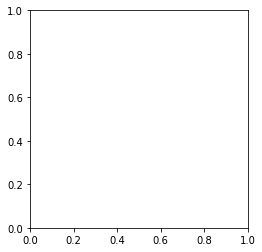

In [101]:

# Run mini-batch training on 50 elements 20000 times.
no_epochs=5

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    #training the network
    for epoch in range(no_epochs):
        epoch_loss=0
        for hello in range(29):
            batchx,batchy=createBatch(hello*100,100)
            #batch= trainData[hello*500:(hello+1)*500], trainLabel[hello*500:(hello+1)*500]
            _,c=sess.run([optimizer, cost], feed_dict={x:batchx, y_:batchy})#here c means cost
            epoch_loss+=c              
        print('Epoch', epoch, 'completed out of', no_epochs, 'loss:', epoch_loss)

        #this line compares the data with the values or output and apply backpropogation
    correct_prediction=tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_,1))  
    accuracy=tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy:',accuracy.eval({x:validData, y_:validLabel}))
      